<a href="https://colab.research.google.com/github/marcossiliprandi/MVP_Analise-de-Dados_Boas-Praticas/blob/main/MVP_Doen%C3%A7as_cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MVP da Sprint Análise de Dados e Boas Práticas**



##Definição do Problema

A doença cardíaca é a principal causa de morte no mundo, a Organização Mundial da Saúde(OMS) estima que metade das mortes em países desenvolvidos são causadas por doenças cardiovasculares. Em um estudo realizado pela Sociedade Brasileira de Cardiologia indica que a casa 10 brasileiros 5 apresentam fatores de risco.

Visando reduzir o numero de pessoas com doenças cardiovasculares, foi pensado em criar um algoritmo de aprendizado supervisionado, Regressão Logística, para realizar a identificação dos pacientes que possuem uma pré disposição a doença cardíaca.

Para realizar a analise foram selecionados como fatores de risco os atributos abaixo:

1 - Age: idade do paciente [anos]

2 - Sex: sexo do paciente [M: Masculino, F: Feminino]

3 - ChestPainType: tipo de dor torácica [TA: Angina típica, ATA: Angina atípica, NAP: Dor não anginosa, ASY: Assintomática]

4 - ResgingBP: pressão arterial em repouso [mm Hg]

5- Cholesterol: colesterol sérico [mm/dl]

6- FastingBS: glicemia em jejum [1: se BS em jejum > 120 mg/dl, 0: caso contrário]

7 - ResgingECG: resultados do eletrocardiograma em repouso [Normal: Normal, ST: com anormalidade das ondas ST-T (inversões das ondas T e/ou elevação ou depressão de ST > 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]

8 - MaxHR: frequência cardíaca máxima alcançada [valor numérico entre 60 e 202]

9 - ExerciseAngina: angina induzida por exercício [Y: Sim, N: Não]

10 - Oldpeak: oldpeak = ST [Valor numérico medido na depressão]

11 - ST_Slope: a inclinação do segmento ST do pico do exercício [Up: subida, Flat: flat, Down: downsloping]

12 - HeartDisease: classe de saída [1: doença cardíaca, 0: Normal]

### Iniciando o MVP

Para iniciar será realizado a importação das bibliotecas necessárias para a execução da Análise Exploratória de Dados e o Pré-processamento de Dados e em seguida a importação do dataset Heart_Disease_Prediction.



In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importar, manipular e analisar dados
import pandas as pd

# Criação de gráficos
import matplotlib.pyplot as plt

In [2]:
# Carregando os dados do dataset que se encontra no Github e utilizando o Pandas para transformar em Dataframe.

url_dados = 'https://raw.githubusercontent.com/marcossiliprandi/MVP_Analise-de-Dados_Boas-Praticas/refs/heads/main/Heart_Disease_Prediction.csv'

Heart_Disease = pd.read_csv(url_dados)

## Análise de dados

Nesta etapa será exibida algumas estatísticas descritivas e realizar uma análise exploratória do dataset, utilizando a biblioteca Pandas. Após a exploração dos dados a biblioteca Matplotlib será utilizada para examinar o dataset através de gráficos.

###Estatísticas descritivas

In [3]:
# Após confirmar que se trata de um dataframe, irei exibir as 5 primeiras linhas para verificar
# se os atributos estão de acordo com a definição do dataset
Heart_Disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Verificando as dimensões do dataset.

Heart_Disease.shape

(918, 12)

In [5]:
# Verificando informações do dataset

Heart_Disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Verificando valores nulos

Heart_Disease.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [7]:
# Verificando as medidas estatísticas

pd.options.display.float_format = '{:.2f}'.format #Formatando valores para 2 casas decimais para uma melhor visualização e entendimento.

Heart_Disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


Realizando os passos de estatística descritiva observo que neste dataset contém 918 instâncias e 12 atributos, sendo 5 numéricos (Age, RestingBP, Cholesterol, MaxHR e Oldpeak) e 7 categóricos (Sex, ChestPainType, FastingBS, ResgingECG, ExercicioAngina, ST_Slope e Heart Disease).

Ao analisar as primeiras linhas constatei que os dados estão de acordo com os atributos e não possui algo que chame a atenção. Também foi verificado que não há atributos com valores nulos.

Ao analisar as medidas estatísticas verifica-se que os pacientes possuem idades de 28 até 77 anos com a media de sendo 53 anos e que os atributos RestingBP e Cholesterol possuem valores discrepantes e inconsistentes.

### Visualizações

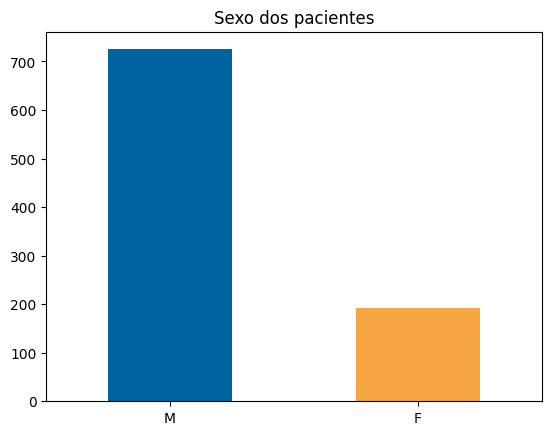

In [21]:
# Visualizando a distribuição do atributo Sex

Heart_Disease['Sex'].value_counts().plot.bar(color = ['#0063A0','#F6A542'])
plt.xlabel(None)
plt.title('Sexo dos pacientes')
plt.xticks(rotation=360)
plt.show()

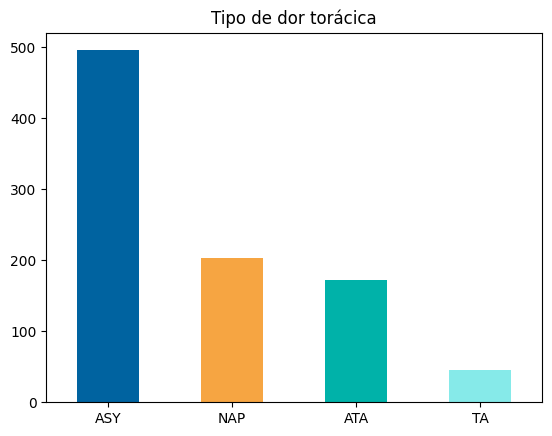

In [22]:
# Visualizando a distribuição do atributo 'ChestPainType'

Heart_Disease['ChestPainType'].value_counts().plot.bar(color = ['#0063A0','#F6A542','#00B2A9','#86EAE9'])
plt.title('Tipo de dor torácica')
plt.xlabel(None)
plt.xticks(rotation=360)
plt.show()

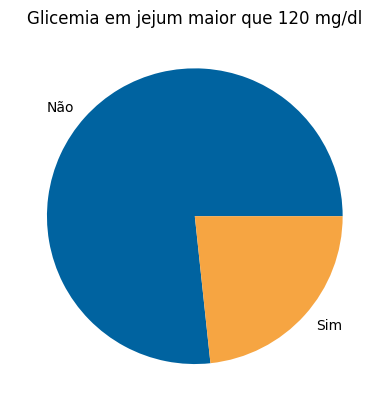

In [23]:
# Visualizando a distribuição do atributo 'FastingBS'

Heart_Disease['FastingBS'].value_counts().plot.pie(labels=['Não', 'Sim'], colors=['#0063A0','#F6A542'])
plt.title('Glicemia em jejum maior que 120 mg/dl')
plt.ylabel(None)
plt.show()

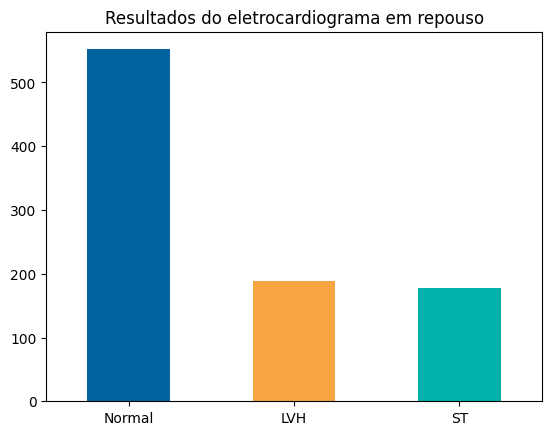

In [24]:
# Visualizando a distribuição do atributo 'RestingECG'

Heart_Disease['RestingECG'].value_counts().plot.bar(color = ['#0063A0','#F6A542','#00B2A9'])
plt.xlabel(None)
plt.xticks(rotation=360)
plt.title('Resultados do eletrocardiograma em repouso')
plt.show()

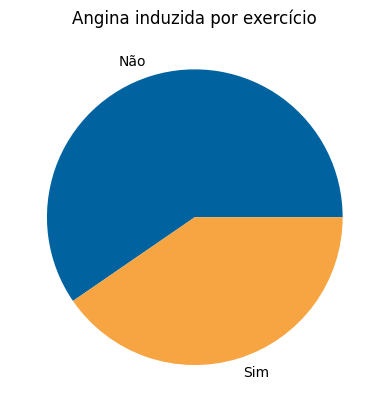

In [26]:
# Visualizando a distribuição do atributo 'ExerciseAngina'

Heart_Disease['ExerciseAngina'].value_counts().plot.pie(labels=['Não', 'Sim'], colors = ['#0063A0','#F6A542'])
plt.ylabel(None)
plt.title('Angina induzida por exercício')
plt.show()

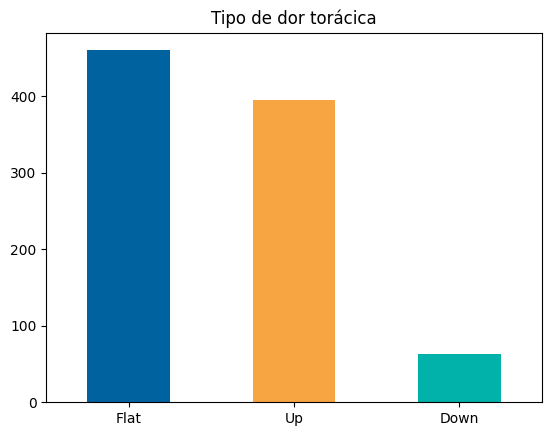

In [27]:
# Visualizando a distribuição do atributo 'ST_Slope'

Heart_Disease['ST_Slope'].value_counts().plot.bar(color = ['#0063A0','#F6A542','#00B2A9'])
plt.title('Tipo de dor torácica')
plt.xlabel(None)
plt.xticks(rotation=360)
plt.show()

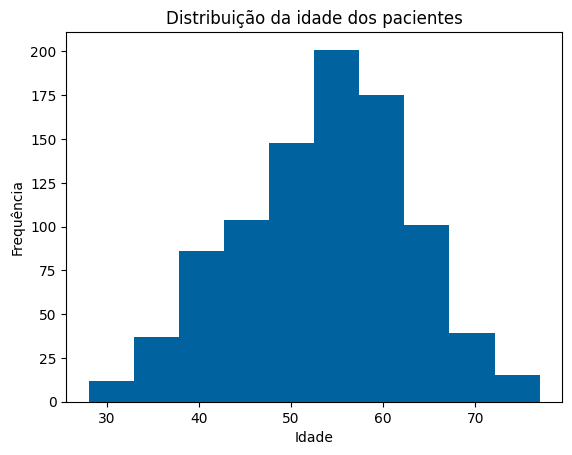

In [28]:
# Visualizando a distribuição do atributo Age

plt.hist(Heart_Disease['Age'], color = ['#0063A0'])
plt.ylabel('Frequência')
plt.xlabel('Idade')
plt.title('Distribuição da idade dos pacientes')
plt.show()

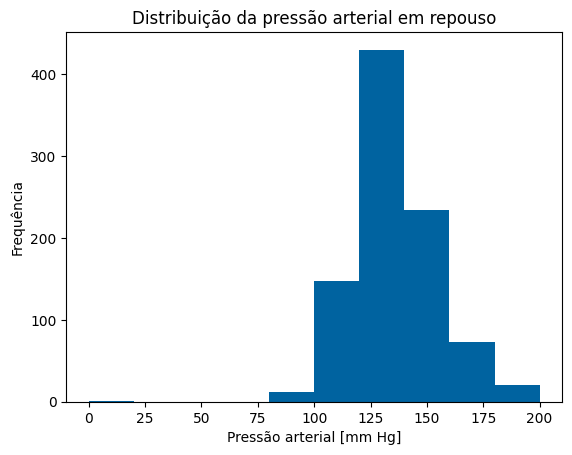

In [29]:
# Visualizando a distribuição do atributo RestingBP

plt.hist(Heart_Disease['RestingBP'], color = ['#0063A0'])
plt.ylabel('Frequência')
plt.xlabel('Pressão arterial [mm Hg]')
plt.title('Distribuição da pressão arterial em repouso')
plt.show()

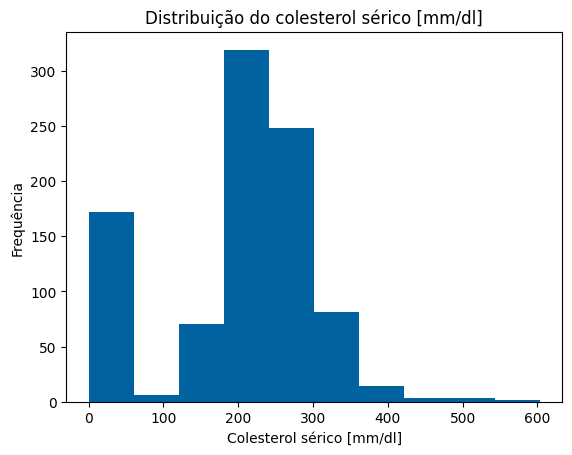

In [31]:
# Visualizando a distribuição do atributo Cholesterol

plt.hist(Heart_Disease['Cholesterol'], color = ['#0063A0'])
plt.ylabel('Frequência')
plt.xlabel('Colesterol sérico [mm/dl]')
plt.title('Distribuição do colesterol sérico [mm/dl]')
plt.show()

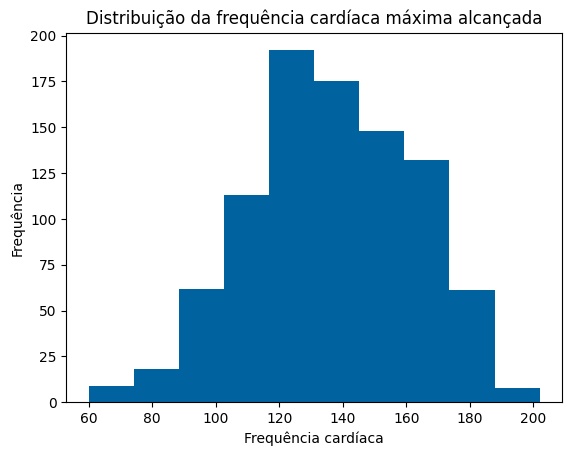

In [32]:
# Visualizando a distribuição do atributo MaxHR

plt.hist(Heart_Disease['MaxHR'], color = ['#0063A0'])
plt.ylabel('Frequência')
plt.xlabel('Frequência cardíaca')
plt.title('Distribuição da frequência cardíaca máxima alcançada')
plt.show()

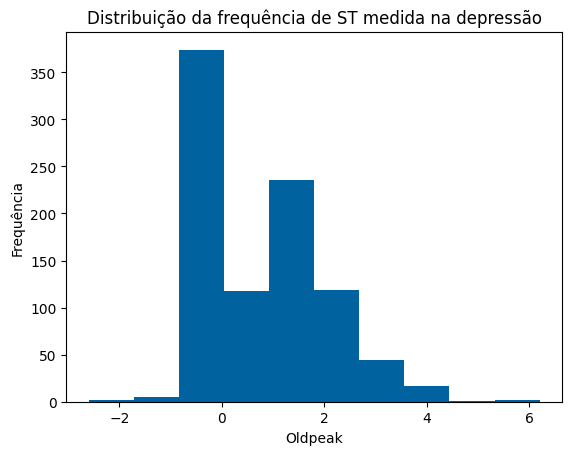

In [33]:
# Visualizando a distribuição do atributo Oldpeak

plt.hist(Heart_Disease['Oldpeak'], color = ['#0063A0'])
plt.ylabel('Frequência')
plt.xlabel('Oldpeak')
plt.title('Distribuição da frequência de ST medida na depressão')
plt.show()

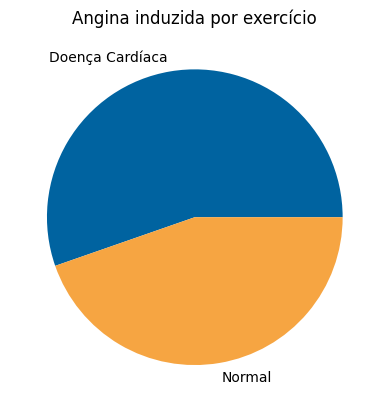

In [30]:
# Por ultimo a visualização da variável Target 'HeartDisease' para avaliar o balanciamento

Heart_Disease['HeartDisease'].value_counts().plot.pie(labels=['Doença Cardíaca', 'Normal'],colors = ['#0063A0','#F6A542'])
plt.ylabel(None)
plt.title('Angina induzida por exercício')
plt.show()